# Demographic Check
**Author:** Jim Maddock  
**Last Updated:** 9-11-19  
**Dscription:** Check to make sure demographic splits are relatively consistant across each voice condition

In [ ]:
if(!require(ggplot2)){install.packages("ggplot2")}

In [2]:
# load data from file
load("~/research_data/mozilla_voice_comparison/Rdata")

data = data[, -c(1:21, 24, 34, 37, 48, 55, 63)]
colnames(data) = c("MID", "audio.paused", "page.seconds", "rate.experience", "rate.speed", "rate.again",
                   "voice.easy", "voice.monotone", "voice.natural", "voice.no_emotion", "voice.focus",
                   "voice.all", "voice.none", "voice.other",
                   "check1", "check2", "check3", "check4", "check5", "check6", "check7", 
                   "age", "gender",
                   "race.asian", "race.hawaiian", "race.aa", "race.cc", "race.latin", "race.indian", "race.other",
                   "income", "state", "device", "device.other", "headphones", "voice")

data = as.data.frame(lapply(data, function (x) if (is.factor(x)) factor(x) else x))

data$check1 = ifelse(data$check1 == "An article about dealing with stress", 1, 0)
data$check2 = ifelse(data$check2 == "His constant need for success", 1, 0)
data$check3 = ifelse(data$check3 == "It oxygenates your brain", 1, 0)
data$check4 = ifelse(data$check4 == "2 and 3", 1, 0)
data$check5 = ifelse(data$check5 == "Ask yourself if a thought is really true.", 1, 0)
data$check6 = ifelse(data$check6 == "Everything has to have a purpose", 1, 0)
data$check7 = ifelse(data$check7 == "Do less than you want to do", 1, 0)
                            
data$age.bins = cut(data$age, breaks=c(10,20, 30, 40, 50, 60,70), right = FALSE)

In [3]:
# number of ppts per condition
as.data.frame(table(data$voice))

Var1,Freq
<fct>,<int>
.Abe,49
.Janice,49
.Jofish,55
Android UK Male,48
Google A,51
Google C,47
iOS Female,51
Judy GL1,56
Judy GL2,50


In [4]:
# gender split
gender = as.data.frame.matrix(table(data$voice, data$gender))
gender$ratio = gender$Man/gender$Woman
gender[order(gender$ratio),]

,Man,These don't describe me,Woman,ratio
,<int>,<int>,<int>,<dbl>
Text only,25,0,28,0.8928571
Judy GL2,24,0,26,0.9230769
Judy Wave2,24,1,26,0.9230769
Judy Wave1,19,0,20,0.9500000
.Jofish,28,0,26,1.0769231
Mac Default,34,0,31,1.0967742
Polly Sally,28,0,23,1.2173913
Polly Matthew,25,0,20,1.2500000
MozillaTTS:LJSpeech,28,0,22,1.2727273


In [12]:
gender = subset(data, gender %in% c('Man','Woman'))
chisq.test(table(data$voice, data$gender))

Warning message in chisq.test(table(data$voice, data$gender)):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  table(data$voice, data$gender)
X-squared = 43.167, df = 42, p-value = 0.4212


Warning message:
“Removed 2 rows containing missing values (geom_bar).”

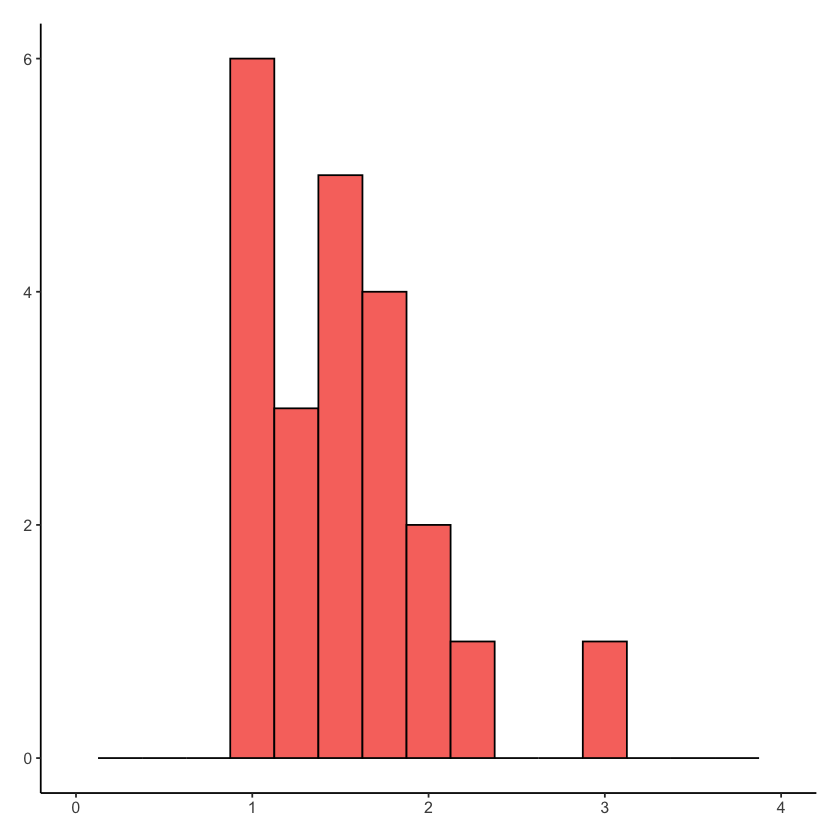

In [85]:
# hist of gender ratios
ggplot(gender, aes(x = ratio, color = "black", fill = "")) +
  geom_histogram(stat = "bin", binwidth = .25, color = "black") +
  guides(color = FALSE, fill=FALSE) + 
  theme_classic() + 
  xlim(c(0,4)) +
  theme(plot.margin=unit(c(.5,.5,.5,.5),"cm"),
        text = element_text(size=12),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank())

In [87]:
# proportion of ages in each condition
age = as.data.frame.matrix(round(prop.table(table(data$voice, data$age.bins), margin = 1), digits = 3))
age

,"[10,20)","[20,30)","[30,40)","[40,50)","[50,60)","[60,70)"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
.Abe,0.000,0.388,0.367,0.163,0.020,0.061
.Janice,0.000,0.306,0.490,0.122,0.061,0.020
.Jofish,0.000,0.259,0.407,0.130,0.111,0.093
Android UK Male,0.000,0.333,0.396,0.125,0.083,0.062
Google A,0.000,0.320,0.420,0.100,0.120,0.040
Google C,0.000,0.283,0.391,0.239,0.022,0.065
iOS Female,0.000,0.333,0.353,0.176,0.137,0.000
Judy GL1,0.000,0.273,0.509,0.127,0.055,0.036
Judy GL2,0.000,0.300,0.420,0.200,0.080,0.000


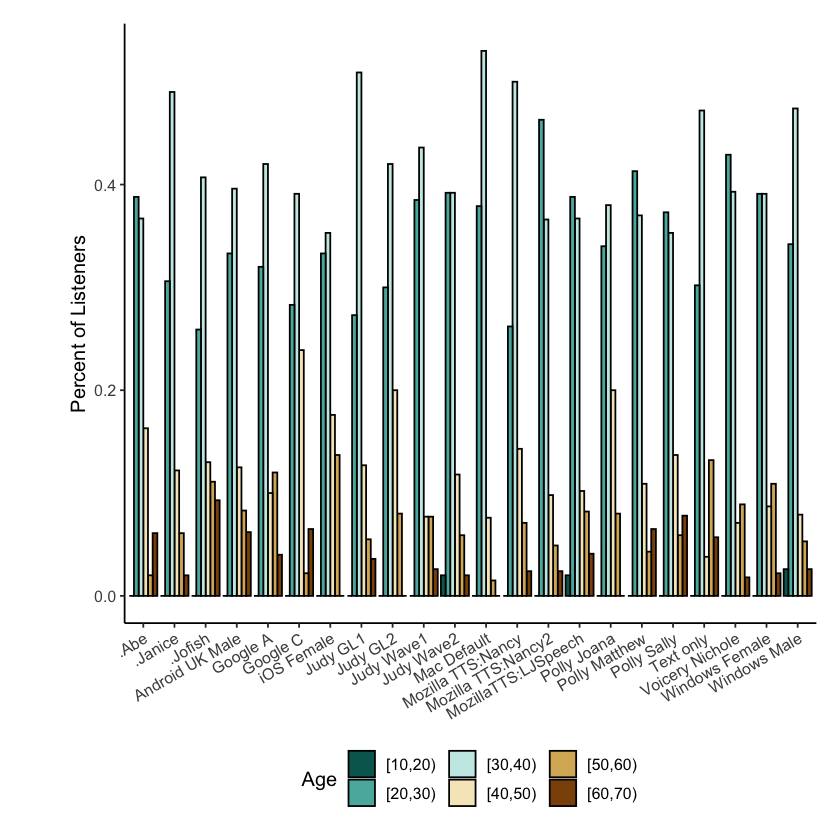

In [88]:
# proportions of ages in each condition graphed as a bar chart

age = as.data.frame(round(prop.table(table(data$voice, data$age.bins), margin = 1), digits = 3))

ggplot(age, aes(x = Var1, y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity", color = "black", position=position_dodge()) +
  labs(y = "Percent of Listeners") +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Age")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)

In [11]:
summary(aov(data$age ~ data$voice))

              Df Sum Sq Mean Sq F value Pr(>F)
data$voice    21   2306   109.8   0.965  0.505
Residuals   1067 121388   113.8               
1 observation deleted due to missingness